In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('AirQualityUCI.csv', sep=';', decimal=',')
df.head()


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [ ]:
# Remove the last two columns that are empty
df = df.iloc[:, :-2]
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [ ]:
# Replace -200 (missing) with NaN
df.replace(-200, np.nan, inplace=True)

# Convert appropriate columns to datetime
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H.%M.%S', dayfirst=True)
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Drop columns with too many missing values (>30%)
missing_percent = df.isnull().mean()
df = df.loc[:, missing_percent < 0.3]

# Impute remaining missing values with median
df.fillna(df.median(), inplace=True)

# Check target and feature columns
print(df.columns)

Index(['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH',
       'AH', 'DateTime'],
      dtype='object')


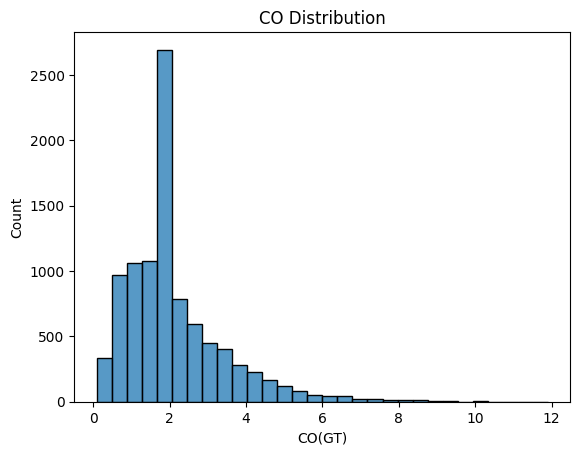

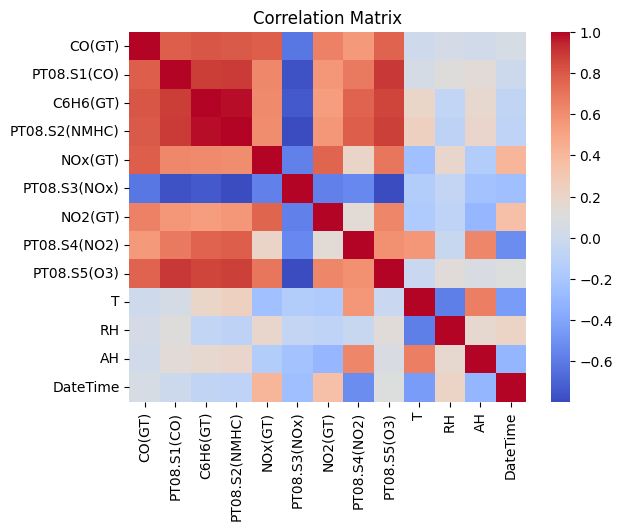

In [ ]:
sns.histplot(df['CO(GT)'], bins=30)
plt.title("CO Distribution")
plt.show()

corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
df['hour'] = df['DateTime'].dt.hour
df['month'] = df['DateTime'].dt.month
df['weekday'] = df['DateTime'].dt.weekday

In [ ]:
features = ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
            'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
            'T', 'RH', 'AH', 'hour', 'month', 'weekday']
target = 'CO(GT)'

In [ ]:
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [ ]:
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

In [ ]:
def evaluate_model(y_true, y_pred, name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name}: MAE={mae:.2f}, RMSE={rmse:.2f}, R²={r2:.2f}")

evaluate_model(y_test, y_pred_lr, 'Linear Regression')
evaluate_model(y_test, y_pred_dt, 'Decision Tree')
evaluate_model(y_test, y_pred_rf, 'Random Forest')
evaluate_model(y_test, y_pred_ridge, 'Ridge')
evaluate_model(y_test, y_pred_lasso, 'Lasso')

Linear Regression: MAE=0.38, RMSE=0.56, R²=0.82
Decision Tree: MAE=0.39, RMSE=0.58, R²=0.81
Random Forest: MAE=0.27, RMSE=0.48, R²=0.87
Ridge: MAE=0.38, RMSE=0.56, R²=0.82
Lasso: MAE=0.39, RMSE=0.57, R²=0.82


PT08.S2(NMHC): 0.500
NOx(GT): 0.193
C6H6(GT): 0.149
NO2(GT): 0.030
PT08.S1(CO): 0.027
hour: 0.019
T: 0.017
PT08.S5(O3): 0.012
month: 0.010
PT08.S3(NOx): 0.010
RH: 0.009
PT08.S4(NO2): 0.009
AH: 0.007
weekday: 0.006


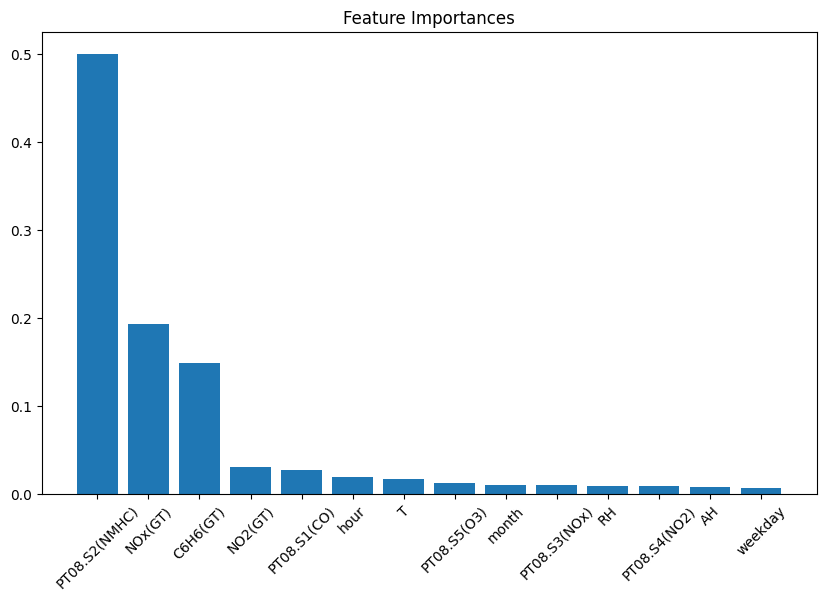

In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
for i in indices:
    print(f"{features[i]}: {importances[i]:.3f}")

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar([features[i] for i in indices], importances[indices])
plt.xticks(rotation=45)
plt.show()


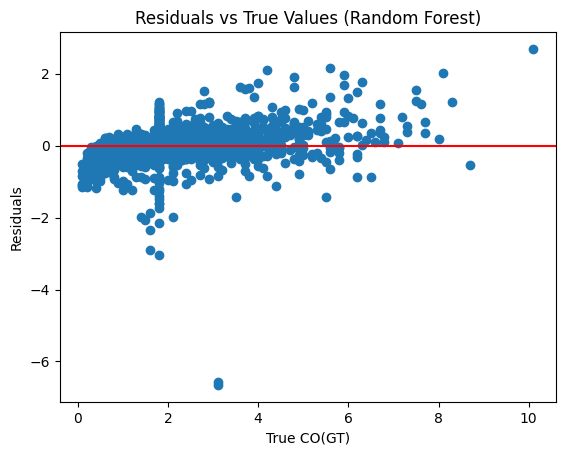

In [ ]:
residuals = y_test - y_pred_rf
plt.scatter(y_test, residuals)
plt.axhline(0, color='red')
plt.xlabel("True CO(GT)")
plt.ylabel("Residuals")
plt.title("Residuals vs True Values (Random Forest)")
plt.show()


In [ ]:
params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
gs = GridSearchCV(RandomForestRegressor(random_state=42), params, cv=3)
gs.fit(X_train, y_train)
print("Best parameters:", gs.best_params_)


Best parameters: {'max_depth': None, 'n_estimators': 200}


In [ ]:
# Save model after training
import joblib
joblib.dump(rf, 'rf_model.pkl')


['rf_model.pkl']